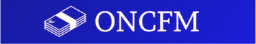

### I. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import calibration_curve
import statsmodels.api as sm

### II. Ajouter les prédictions au dataframe d’origine

In [2]:
def prediction_fichier(nom_fichier):
    
    # 1ere etape : Importer un fichier generique

    billets_a_predire = pd.read_csv(nom_fichier)

    # 2eme etape : Importer le modele
    model = pickle.load(open('model_reg_log.pkl','rb'))


    # 3eme etape standardiser les données
    x = billets_a_predire[["height_right","margin_low", "margin_up", "length"]]

    # 4eme etape appel du modele
    x =sm.add_constant(x)

    # 5eme etape calcul probabilité vrai billet
    proba_predict = model.predict(x)

    # 6eme classe predite
    y_pred = (model.predict(x) >= 0.5).astype(int)

    # 7eme renomons les colonnes

    billets_a_predire['proba_vrai'] = proba_predict * 100
    billets_a_predire['classe_predite'] = y_pred
#     print(billets_a_predire[["id",'proba_vrai','classe_predite']])

#     # Affichage des resultats:
#     print("\nIndetification des billets:")
#     for i, k in zip(billets_a_predire['classe_predite'],billets_a_predire["id"]):
#         if i == 1:
#             print("Le billet","{}".format(k),"Vrai billet")
#         else: 
#             print("Le billet","{}".format(k),"Faux billet")

    return billets_a_predire      

In [7]:
df_predict = prediction_fichier('billets_production.csv')

df_predict   

C:\Users\moust\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,diagonal,height_left,height_right,margin_low,margin_up,length,id,proba_vrai,classe_predite
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.004105,0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.000340,0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.001873,0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,99.670829,1
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,99.998844,1
